<img src="../fasp/runner/credits/images/FASPNotebook07.jpg" style="float: right;">


### Query for a specific variant


In [1]:
from fasp.runner import FASPRunner

# The implementations we're using
from fasp.search import BigQuerySearchClient
from fasp.loc import crdcDRSClient
from fasp.workflow import sbcgcWESClient


faspRunner = FASPRunner(program='FASPNotebook07')
settings = faspRunner.settings

searchClient = BigQuerySearchClient()
drsClient = crdcDRSClient('~/.keys/crdc_credentials.json','gs')
mysam = sbcgcWESClient(settings['SevenBridgesProject'])	

faspRunner.configure(searchClient, drsClient, mysam)

query = """
SELECT mut.case_barcode subject, meta.file_gdc_id as drs_id, 
meta.file_gdc_url as tumor_bam_file_path,
clin.race, clin.age_at_diagnosis, clin.ethnicity
  
FROM `isb-cgc.TCGA_hg38_data_v0.Somatic_Mutation` as mut 
join `isb-cgc.TCGA_bioclin_v0.Clinical` as clin 
on clin.case_barcode = mut.case_barcode 
join `isb-cgc.GDC_metadata.rel24_GDCfileID_to_GCSurl` as meta 
on meta.file_gdc_id = mut.tumor_bam_uuid #OR meta.file_gdc_id = mut.normal_bam_uuid 

where mut.Hugo_Symbol = "JMJD1C" 

order by meta.file_gdc_id
limit 3"""

faspRunner.runQuery(query, 'JMJD1C query ')

Running query

SELECT mut.case_barcode subject, meta.file_gdc_id as drs_id, 
meta.file_gdc_url as tumor_bam_file_path,
clin.race, clin.age_at_diagnosis, clin.ethnicity
  
FROM `isb-cgc.TCGA_hg38_data_v0.Somatic_Mutation` as mut 
join `isb-cgc.TCGA_bioclin_v0.Clinical` as clin 
on clin.case_barcode = mut.case_barcode 
join `isb-cgc.GDC_metadata.rel24_GDCfileID_to_GCSurl` as meta 
on meta.file_gdc_id = mut.tumor_bam_uuid #OR meta.file_gdc_id = mut.normal_bam_uuid 

where mut.Hugo_Symbol = "JMJD1C" 

order by meta.file_gdc_id
limit 3
subject=TCGA-02-2466, drsID=00b7d61d-9169-4b17-899e-edc7a5cd7509
workflow submitted, run:fa875768-f4c9-4bbc-8ad9-dddf891f0cce
____________________________________________________________
subject=TCGA-02-2466, drsID=00b7d61d-9169-4b17-899e-edc7a5cd7509
workflow submitted, run:e3676e9c-d9a3-48ec-b417-2e4126567b61
____________________________________________________________
subject=TCGA-H7-A6C4, drsID=00e1676d-b6c5-4d72-b69c-0110e38f6aef
workflow submitted, run:

[{'subject': 'TCGA-02-2466', 'run_id': 'fa875768-f4c9-4bbc-8ad9-dddf891f0cce'},
 {'subject': 'TCGA-02-2466', 'run_id': 'e3676e9c-d9a3-48ec-b417-2e4126567b61'},
 {'subject': 'TCGA-H7-A6C4', 'run_id': '17b8ab74-a22f-4f1c-982b-f6e1df62bf36'}]

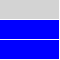

In [4]:
faspRunner.getFASPicon()